<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/Modeling_1st_Try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests



In [3]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving 7_6_23 - Vader + Volatility - Final (4).csv to 7_6_23 - Vader + Volatility - Final (4).csv


In [8]:
columns =    ["compound","VCDAX_V", "VCSAX_V", "VENAX_V", "VFAIX_V", "VGSLX_V", "VGHCX_V", "VITAX_V", "VMAIX_V", "VSPVX_V", "VTCAX_V",
           "VUIAX_V", "VINAX_V", "VUIAX_P", "VGHCX_P", "VFAIX_P", "VSPVX_P", "VITAX_P", "VMIAX_P", "VGSLX_P", "VINAX_P",
           "VTCAX_P", "VCSAX_P", "VENAX_P", "VCDAX_P"]

data_filtered = df[columns].dropna()

In [ ]:
#checking for stationary data - KPSS

from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

for target_column in columns:
  print(

  )
  print(target_column)
  kpss_test(data_filtered[target_column])

In [53]:
# Drop rows with NaN values in 'compound' and the target columns
columns =    ["date","compound","VCDAX_V", "VCSAX_V", "VENAX_V", "VFAIX_V", "VGSLX_V", "VGHCX_V", "VITAX_V", "VMAIX_V", "VSPVX_V", "VTCAX_V",
           "VUIAX_V", "VINAX_V", "VUIAX_P", "VGHCX_P", "VFAIX_P", "VSPVX_P", "VITAX_P", "VMIAX_P", "VGSLX_P", "VINAX_P",
           "VTCAX_P", "VCSAX_P", "VENAX_P", "VCDAX_P"]

data_filtered = df[columns].dropna()

In [ ]:
# Perform the Granger causality test for each target column
max_lag = 5  # Maximum lag to consider

for target_column in columns[2:]:
    print(f"Testing Granger causality: compound -> {target_column}")
    granger_data = data_filtered[[target_column, 'compound']]

    # Reshape the data to have a 1-dimensional shape
    granger_data = granger_data.values.reshape(-1, 2)

    results = grangercausalitytests(granger_data, max_lag, verbose=False)

    # Extract the p-values from the test results
    p_values = [results[i + 1][0]['ssr_ftest'][1] for i in range(max_lag)]

    # Print the p-values and interpretation
    for lag, p_value in enumerate(p_values):
        print(f"Lag {lag + 1}: p-value = {p_value:.4f}")
        if p_value < 0.05:
            print("  Granger causality is statistically significant.")
        else:
            print("  Granger causality is not statistically significant.")
    print()


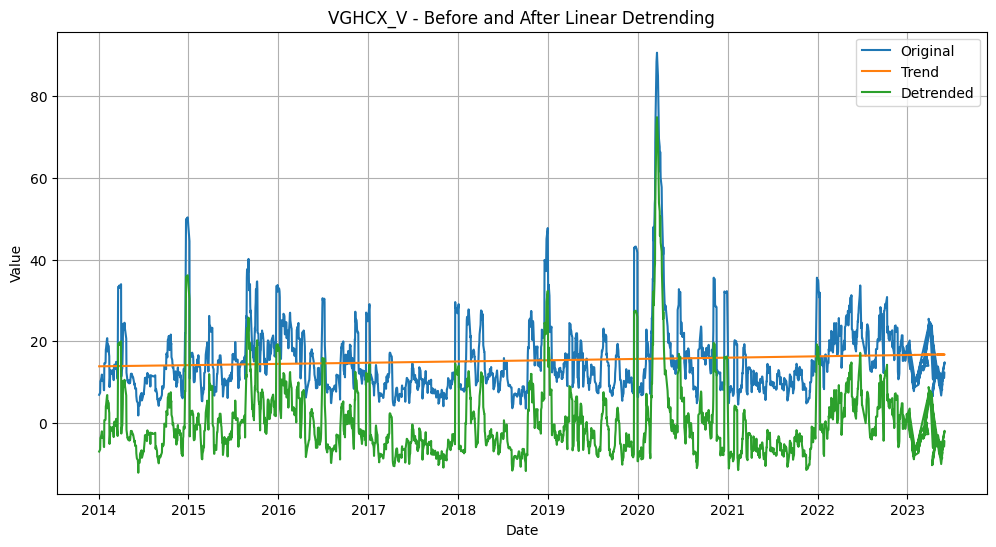

Regression Statistics:
R-value: 0.0088
Slope: 0.0013
Intercept: 13.8935


In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Filter the dataset and extract relevant columns
columns = ["date", "compound", "VGHCX_V"]
data_filtered = df[columns].dropna()

# Extract the values of the "VGHCX_V" column
x = np.arange(len(data_filtered))
y = data_filtered["VGHCX_V"].values

# Fit a linear regression model to the data
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Get the regression statistics
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
r_value = regressor.score(x.reshape(-1, 1), y.reshape(-1, 1))

# Predict the trend using the linear regression model
trend = regressor.predict(x.reshape(-1, 1))

# Subtract the trend from the original values to obtain the detrended series
detrended = y - trend.flatten()

# Replace the "VGHCX_V" column in the dataset with the detrended values
data_filtered["VGHCX_V"] = detrended

# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], y, label="Original")
plt.plot(data_filtered["date"], trend, label="Trend")
plt.plot(data_filtered["date"], detrended, label="Detrended")
plt.title("VGHCX_V - Before and After Linear Detrending")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Print regression statistics
print("Regression Statistics:")
print(f"R-value: {r_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

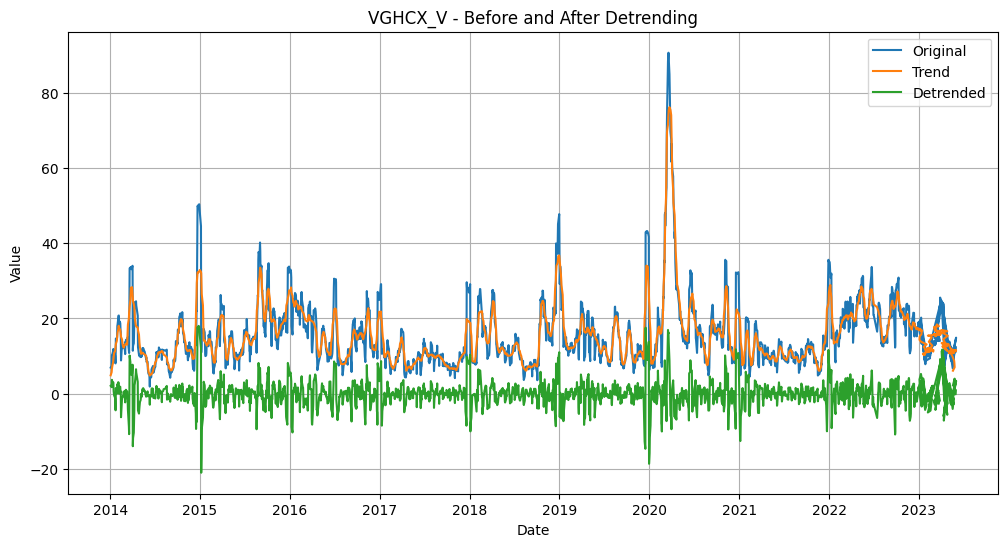

Regression Statistics:
R-value: 0.0000
Slope: -0.0000
Intercept: 0.0244


In [84]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Filter the dataset and extract relevant columns
columns = ["date", "compound", "VGHCX_V"]
data_filtered = df[columns].dropna()

# Extract the values of the "VGHCX_V" column
x = np.arange(len(data_filtered))
y = data_filtered["VGHCX_V"].values

# Specify the window size for the moving average
window_size = 12  # Assuming a yearly seasonal pattern with monthly data

# Compute the moving average
trend = np.convolve(y, np.ones(window_size)/window_size, mode='same')

# Subtract the moving average trend from the original values to obtain the detrended series
detrended = y - trend

# Replace the "VGHCX_V" column in the dataset with the detrended values
data_filtered["VGHCX_V"] = detrended

# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], y, label="Original")
plt.plot(data_filtered["date"], trend, label="Trend")
plt.plot(data_filtered["date"], detrended, label="Detrended")
plt.title("VGHCX_V - Before and After Detrending")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Fit a linear regression model to the detrended data
regressor = LinearRegression()
regressor.fit(x.reshape(-1, 1), detrended.reshape(-1, 1))

# Get the regression statistics
slope = regressor.coef_[0][0]
intercept = regressor.intercept_[0]
r_value = regressor.score(x.reshape(-1, 1), detrended.reshape(-1, 1))

# Print regression statistics
print("Regression Statistics:")
print(f"R-value: {r_value:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")


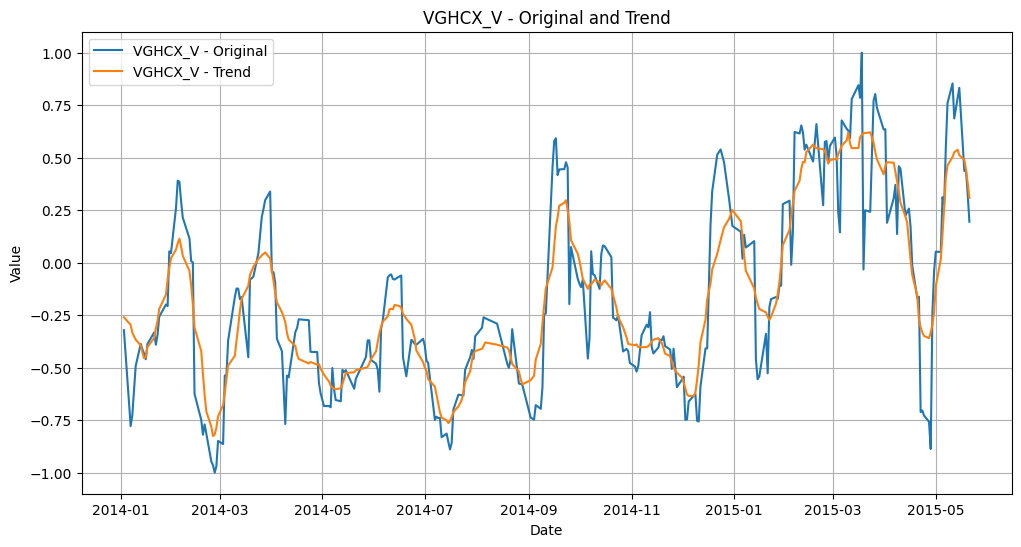

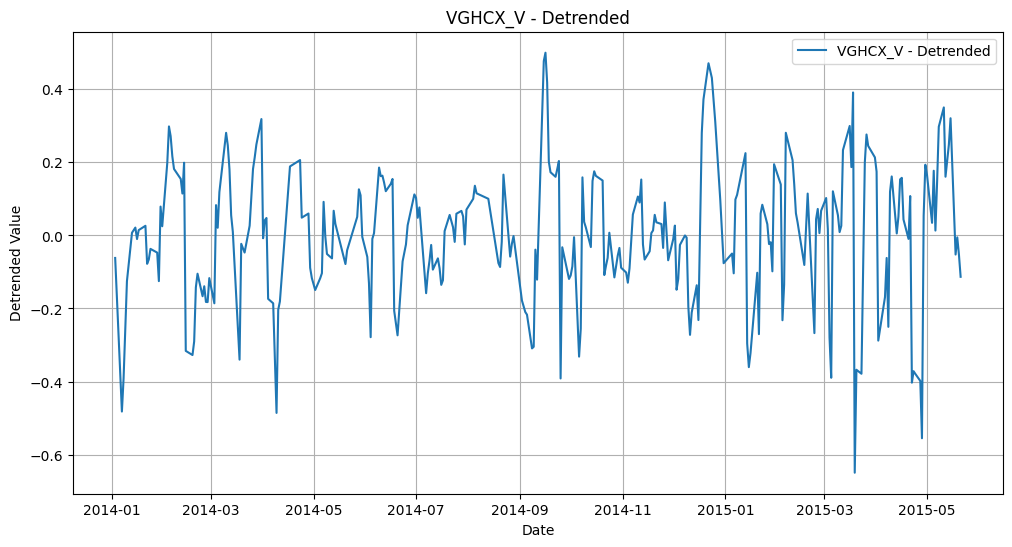

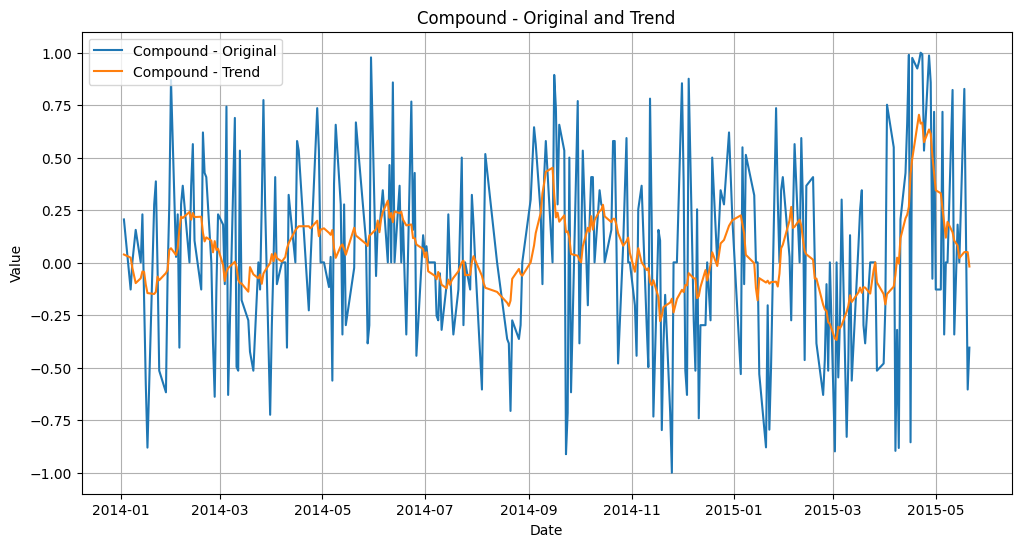

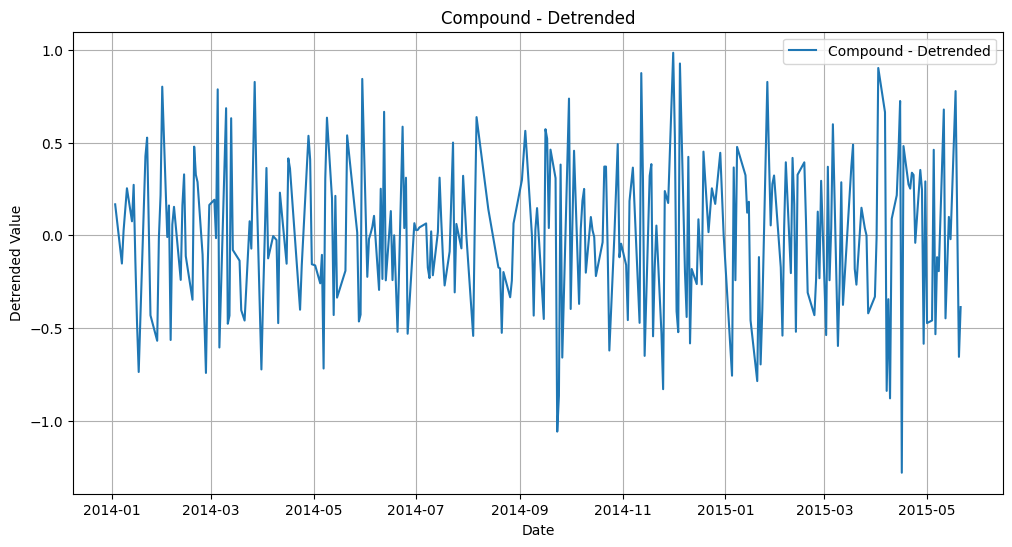

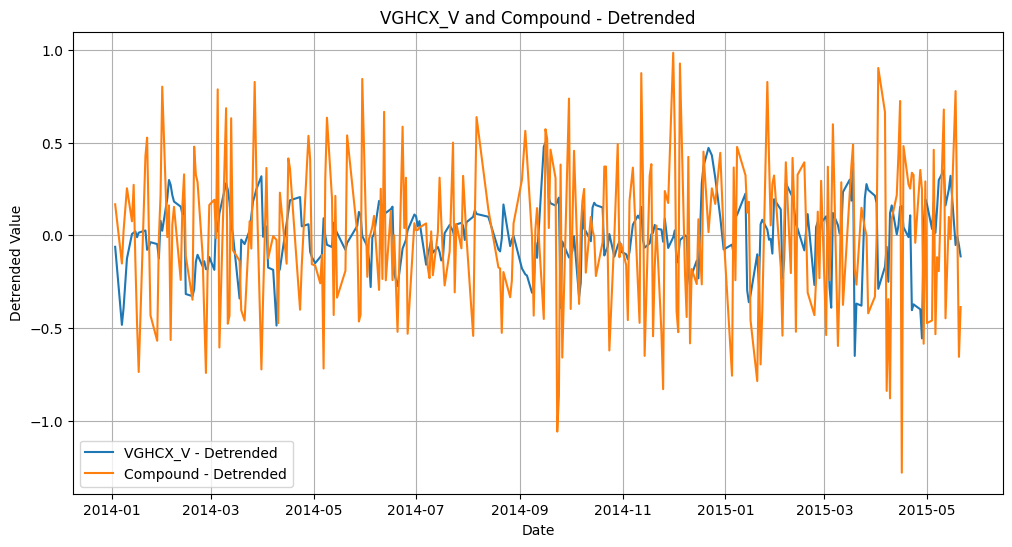

Regression Statistics for VGHCX_V:
R-value: 0.0024
Slope: 0.0001
Intercept: -0.0155
Regression Statistics for compound:
R-value: 0.0000
Slope: -0.0000
Intercept: 0.0027


In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Filter the dataset and extract relevant columns
columns = ["date", "compound", "VGSLX_V"]
data_filtered = df[columns].dropna()
data_filtered = data_filtered.head(300)

# Extract the values of the "VGHCX_V" and "compound" columns
x = np.arange(len(data_filtered))
y_vghcx = data_filtered["VGSLX_V"].values
y_compound = data_filtered["compound"].values

# Normalize VGHCX_V values to range from -1 to 1
scaler = MinMaxScaler(feature_range=(-1, 1))
y_vghcx_normalized = scaler.fit_transform(y_vghcx.reshape(-1, 1)).flatten()

# Specify the window size for the moving average
window_size = 12  # Assuming a yearly seasonal pattern with monthly data

# Compute the moving average for VGHCX_V
trend_vghcx = np.convolve(y_vghcx_normalized, np.ones(window_size)/window_size, mode='same')

# Subtract the moving average trend from the original values to obtain the detrended VGHCX_V series
detrended_vghcx = y_vghcx_normalized - trend_vghcx

# Plot the original and trend series for VGHCX_V
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], y_vghcx_normalized, label="VGHCX_V - Original")
plt.plot(data_filtered["date"], trend_vghcx, label="VGHCX_V - Trend")
plt.title("VGHCX_V - Original and Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot the detrended series for VGHCX_V
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], detrended_vghcx, label="VGHCX_V - Detrended")
plt.title("VGHCX_V - Detrended")
plt.xlabel("Date")
plt.ylabel("Detrended Value")
plt.legend()
plt.grid(True)
plt.show()

# Normalize compound values to range from -1 to 1
scaler_compound = MinMaxScaler(feature_range=(-1, 1))
y_compound_normalized = scaler_compound.fit_transform(y_compound.reshape(-1, 1)).flatten()

# Specify the window size for the moving average
window_size = 12  # Assuming a yearly seasonal pattern with monthly data

# Compute the moving average for compound
trend_compound = np.convolve(y_compound_normalized, np.ones(window_size)/window_size, mode='same')

# Subtract the moving average trend from the original values to obtain the detrended compound series
detrended_compound = y_compound_normalized - trend_compound

# Plot the original and trend series for compound
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], y_compound_normalized, label="Compound - Original")
plt.plot(data_filtered["date"], trend_compound, label="Compound - Trend")
plt.title("Compound - Original and Trend")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot the detrended series for compound
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], detrended_compound, label="Compound - Detrended")
plt.title("Compound - Detrended")
plt.xlabel("Date")
plt.ylabel("Detrended Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot the detrended series for VGHCX_V and compound together
plt.figure(figsize=(12, 6))
plt.plot(data_filtered["date"], detrended_vghcx, label="VGHCX_V - Detrended")
plt.plot(data_filtered["date"], detrended_compound, label="Compound - Detrended")
plt.title("VGHCX_V and Compound - Detrended")
plt.xlabel("Date")
plt.ylabel("Detrended Value")
plt.legend()
plt.grid(True)
plt.show()

# Fit a linear regression model to the detrended VGHCX_V data
regressor_vghcx = LinearRegression()
regressor_vghcx.fit(x.reshape(-1, 1), detrended_vghcx.reshape(-1, 1))

# Get the regression statistics for VGHCX_V
slope_vghcx = regressor_vghcx.coef_[0][0]
intercept_vghcx = regressor_vghcx.intercept_[0]
r_value_vghcx = regressor_vghcx.score(x.reshape(-1, 1), detrended_vghcx.reshape(-1, 1))

# Fit a linear regression model to the detrended compound data
regressor_compound = LinearRegression()
regressor_compound.fit(x.reshape(-1, 1), detrended_compound.reshape(-1, 1))

# Get the regression statistics for compound
slope_compound = regressor_compound.coef_[0][0]
intercept_compound = regressor_compound.intercept_[0]
r_value_compound = regressor_compound.score(x.reshape(-1, 1), detrended_compound.reshape(-1, 1))

# Print regression statistics
print("Regression Statistics for VGHCX_V:")
print(f"R-value: {r_value_vghcx:.4f}")
print(f"Slope: {slope_vghcx:.4f}")
print(f"Intercept: {intercept_vghcx:.4f}")

print("Regression Statistics for compound:")
print(f"R-value: {r_value_compound:.4f}")
print(f"Slope: {slope_compound:.4f}")
print(f"Intercept: {intercept_compound:.4f}")
